Our Goal for this project is to compare between three different famous Machine Learning Algorithms on solving a specific problem which is the assessing the chances of default from a a customer requesting a bank loan

## Importing the necessary libraries and the data

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [235]:
df = pd.read_csv('CreditScoring.csv')

In [236]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


## Data Cleaning

In [180]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [181]:
status_values = {
    1 : 'ok',
    2 : 'default',
    0 : 'unk'
}
df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [182]:
home_values = {
    1 : 'rent',
    2 : 'owner',
    3 : 'private',
    4 : 'ignore',
    5 : 'parents',
    6 : 'other',
    0 : 'unk'
}
df.home = df.home.map(home_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,1,1,1,46,107,0,0,310,910


In [183]:
marital_values = {
    1:'single',
    2 :'married',
    3 :'widow',
    4 :'divorced',
    0 :'unk'
}
df.marital = df.marital.map(marital_values)

records_values = {
 1: 'no',
 2: 'yes',
 0: 'unk'
}
df.records = df.records.map(records_values)
job_values = {
 1: 'fixed',
 2: 'partime',
 3: 'freelance',
 4: 'others',
 0: 'unk'
}
df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [184]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [185]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [186]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [187]:
df = df[df.status != 'unk']
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [188]:
df = df.fillna(0)

In [189]:
categorical = df.select_dtypes(include = ['object'])
categorical = categorical.drop(columns = ['status'])
y = df.status == 'default'
y

0       False
1       False
2        True
3       False
4       False
        ...  
4450     True
4451    False
4452     True
4453    False
4454    False
Name: status, Length: 4454, dtype: bool

In [190]:
numerical = df.select_dtypes(include = ['int64', 'float64'])
numerical.head()

,seniority,time,age,expenses,income,assets,debt,amount,price
0,9,60,30,73,129.0,0.0,0.0,800,846
1,17,60,58,48,131.0,0.0,0.0,1000,1658
2,10,36,46,90,200.0,3000.0,0.0,2000,2985
3,0,60,24,63,182.0,2500.0,0.0,900,1325
4,0,36,26,46,107.0,0.0,0.0,310,910


In [191]:
for col in categorical.columns:
    categorical[col].replace([0,'unk'], categorical[col].mode().iloc[0], inplace=True)
    print(categorical[col].value_counts())


home
owner      2113
rent        973
parents     783
other       319
private     246
ignore       20
Name: count, dtype: int64
marital
married     3280
single       977
divorced     130
widow         67
Name: count, dtype: int64
records
no     3681
yes     773
Name: count, dtype: int64
job
fixed        2807
freelance    1024
partime       452
others        171
Name: count, dtype: int64


In [192]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, y)

mi = categorical.apply(calculate_mi)
mi


home       0.024318
marital    0.005537
records    0.035426
job        0.033611
dtype: float64

In [193]:
for col in numerical.columns:
    numerical[col].replace([0], numerical[col].mean(), inplace=True)

In [194]:
numerical.corrwith(y)

seniority   -0.206100
time         0.100627
age         -0.095301
expenses     0.028855
income      -0.148561
assets      -0.053762
debt         0.012814
amount       0.154549
price        0.010740
dtype: float64

## Prepare data for training

In [195]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 11)

In [196]:
y_train = df_train.status == 'default'
y_val = df_val.status == 'default'
del df_train['status']
del df_val['status']


In [197]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [198]:
dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')

In [199]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse = False)
dv.fit(dict_train)
X_train = dv.transform(dict_train)
X_val = dv.transform(dict_val)


## Decision Tree

### Training the model and evaluating it

In [200]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [201]:
from sklearn.metrics import roc_auc_score
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

In [202]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.639452301954421

we can observe a case of overfitting here, which means th emodel is too complex. we can try restricting the tree's depth to decrease the model's complexity



In [203]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

In [204]:
from sklearn.tree import export_text
print(export_text(dt, feature_names = dv.feature_names_))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: False
|   |--- job=partime >  0.50
|   |   |--- class: True



In [205]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc', auc)

train auc 0.7054989859726213
validation auc 0.6685264343319367


### Hyperparameter tuning

In [206]:
def train_tree(max_depth = None, min_samples_leaf=1):
  dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
  dt.fit(X_train, y_train)
  return dt

In [207]:
for max_depth in  [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
  dt = train_tree(max_depth)
  y_pred = dt.predict_proba(X_train)[:, 1]
  auc = roc_auc_score(y_train, y_pred)
  print('max_depth =', max_depth, 'train auc', auc)
  y_pred = dt.predict_proba(X_val)[:, 1]
  auc = roc_auc_score(y_val, y_pred)
  print('validation auc', auc)

max_depth = 1 train auc 0.6282660131823559
validation auc 0.6058644740984719
max_depth = 2 train auc 0.7054989859726213
validation auc 0.6685264343319367
max_depth = 3 train auc 0.7761016984958594
validation auc 0.7389079944782155
max_depth = 4 train auc 0.8164293560926146
validation auc 0.7612827250490422
max_depth = 5 train auc 0.8433781899611289
validation auc 0.7669377103969388
max_depth = 6 train auc 0.8744743253901189
validation auc 0.7484530527233538
max_depth = 10 train auc 0.964927680130697
validation auc 0.7110326705577487
max_depth = 15 train auc 0.9991401892851107
validation auc 0.6600530381923422
max_depth = 20 train auc 1.0
validation auc 0.6542224697876051
max_depth = None train auc 1.0
validation auc 0.6548400377806302


In [208]:
for max_depth in [4,5,6]:
  for s in [1,5,10,15,20,50,100,200]:
    dt = train_tree(max_depth = max_depth, min_samples_leaf = s)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('max_depth =', max_depth, 'min_samples_leaf =', s, 'val auc', auc)


max_depth = 4 min_samples_leaf = 1 val auc 0.7612827250490422
max_depth = 4 min_samples_leaf = 5 val auc 0.7612827250490422
max_depth = 4 min_samples_leaf = 10 val auc 0.7612827250490422
max_depth = 4 min_samples_leaf = 15 val auc 0.7637257513743916
max_depth = 4 min_samples_leaf = 20 val auc 0.760910367876777
max_depth = 4 min_samples_leaf = 50 val auc 0.7534571698433072
max_depth = 4 min_samples_leaf = 100 val auc 0.7559365236976581
max_depth = 4 min_samples_leaf = 200 val auc 0.7472602988544719
max_depth = 5 min_samples_leaf = 1 val auc 0.7669377103969388
max_depth = 5 min_samples_leaf = 5 val auc 0.7681728463829891
max_depth = 5 min_samples_leaf = 10 val auc 0.7618094742195636
max_depth = 5 min_samples_leaf = 15 val auc 0.7727228693904241
max_depth = 5 min_samples_leaf = 20 val auc 0.7735372114988738
max_depth = 5 min_samples_leaf = 50 val auc 0.7681970647356566
max_depth = 5 min_samples_leaf = 100 val auc 0.7633836671429609
max_depth = 5 min_samples_leaf = 200 val auc 0.7590728003

In [209]:
final_dt = train_tree(max_depth = 6, min_samples_leaf = 15)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7682666924995762

## Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state = 3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=3)

In [211]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7801548763653097

### Parameter tuning for random forest

In [212]:
def get_aucs_rf(max_depth=None,s = 1):
  aucs = []
  for i in range(10,201,10):
    rf = RandomForestClassifier(n_estimators = i, max_depth = max_depth,min_samples_leaf = s,random_state=3)
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    aucs.append(auc)
  return aucs
aucs = get_aucs_rf()

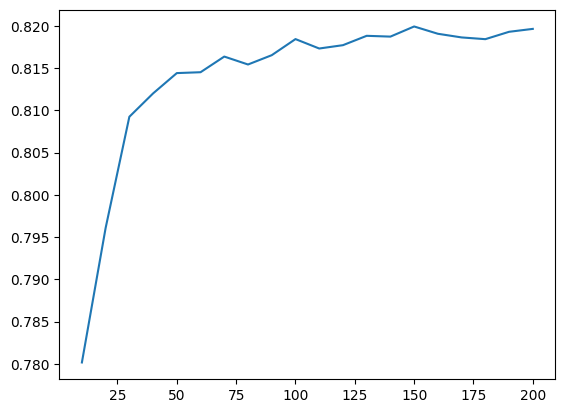

In [213]:
plt.plot(range(10,201,10), aucs)

In [214]:
max_depth_dict ={}
for max_depth in [5,10,15,20,25]:
  aucs = get_aucs_rf(max_depth = max_depth)
  max_depth_dict[max_depth] = aucs

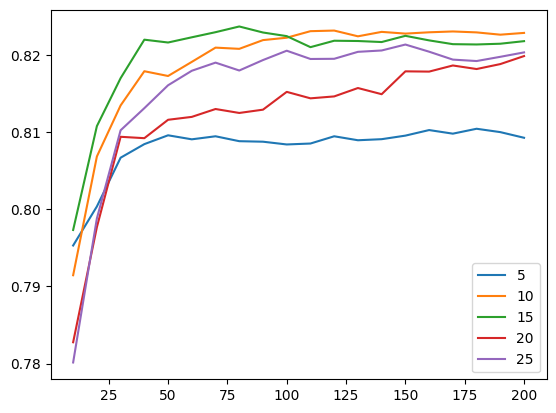

In [215]:
for key in max_depth_dict.keys():
  plt.plot(range(10,201,10), max_depth_dict[key], label = key)
plt.legend()
plt.show()

In [216]:
min_samples_dict={}
for m in [3,5,10]:
  aucs = get_aucs_rf(s = m, max_depth = 10 )
  min_samples_dict[m] = aucs


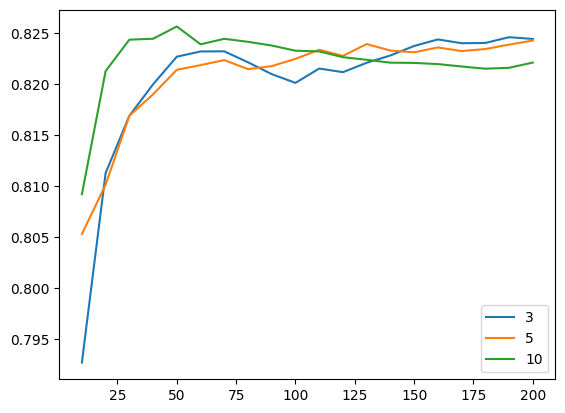

In [217]:
for key in min_samples_dict.keys():
  plt.plot(range(10,201,10), min_samples_dict[key], label = key)
plt.legend()
plt.show()

We can conclude that the best parameters for max_depth is 10 and for min_samples_leaf = 5

In [176]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 10, min_samples_leaf = 5, random_state = 1)
rf.fit(X_train,y_train)
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
auc

0.8255461238526556

## Gradient Boosting

In [218]:
import xgboost as xgb

In [219]:
dtrain = xgb.DMatrix(data= X_train, label = y_train, feature_names = dv.feature_names_)
dval = xgb.DMatrix(data = X_val, label = y_val, feature_names = dv.feature_names_)

In [220]:
xgb_params = {'eta' : 0.3, 'max_depth':6,'min_child_weight':1,'objective':'binary:logistic','nthread':8,'seed':1,'silent':1}
model = xgb.train(xgb_params,dtrain,num_boost_round = 10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [221]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.07751459, 0.07131889, 0.0675393 , 0.12096145, 0.05379206,
       0.06382526, 0.06665564, 0.4352498 , 0.41923273, 0.02550563],
      dtype=float32)

In [222]:
roc_auc_score(y_val,y_pred)

0.8065256351262986

In [223]:
xgb_params = {'eta' : 0.3, 'max_depth':6,'min_child_weight':1,'objective':'binary:logistic','nthread':8,'seed':1,'silent':1, 'eval_metric':'auc'}
watchlist = [(dtrain,'train'),(dval,'val')]

In [224]:
model = xgb.train(xgb_params, dtrain, num_boost_round = 100, evals = watchlist,verbose_eval = 10)

[0]	train-auc:0.86730	val-auc:0.77938
[10]	train-auc:0.95447	val-auc:0.80851


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	train-auc:0.97464	val-auc:0.81729
[30]	train-auc:0.98579	val-auc:0.81543
[40]	train-auc:0.99421	val-auc:0.80922
[50]	train-auc:0.99653	val-auc:0.80918
[60]	train-auc:0.99817	val-auc:0.81172
[70]	train-auc:0.99934	val-auc:0.80870
[80]	train-auc:0.99979	val-auc:0.80549
[90]	train-auc:0.99993	val-auc:0.80409
[99]	train-auc:0.99999	val-auc:0.80560


### Hyperparameter tuning for XGBoost

In [225]:
xgb_params['eta'] = 0.1
model = xgb.train(xgb_params, dtrain, num_boost_round = 500, evals = watchlist,verbose_eval = 10)

[0]	train-auc:0.86730	val-auc:0.77938
[10]	train-auc:0.91874	val-auc:0.80510
[20]	train-auc:0.93873	val-auc:0.81804


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:43:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[30]	train-auc:0.95338	val-auc:0.82063
[40]	train-auc:0.96325	val-auc:0.82644
[50]	train-auc:0.97195	val-auc:0.82549
[60]	train-auc:0.97708	val-auc:0.82781
[70]	train-auc:0.98214	val-auc:0.82681
[80]	train-auc:0.98517	val-auc:0.82560
[90]	train-auc:0.98840	val-auc:0.82443
[100]	train-auc:0.99061	val-auc:0.82456
[110]	train-auc:0.99224	val-auc:0.82274
[120]	train-auc:0.99378	val-auc:0.82154
[130]	train-auc:0.99541	val-auc:0.82252
[140]	train-auc:0.99630	val-auc:0.82219
[150]	train-auc:0.99711	val-auc:0.82136
[160]	train-auc:0.99774	val-auc:0.82102
[170]	train-auc:0.99838	val-auc:0.82060
[180]	train-auc:0.99882	val-auc:0.82053
[190]	train-auc:0.99904	val-auc:0.81973
[200]	train-auc:0.99929	val-auc:0.81830
[210]	train-auc:0.99947	val-auc:0.81806
[220]	train-auc:0.99961	val-auc:0.81763
[230]	train-auc:0.99972	val-auc:0.81727
[240]	train-auc:0.99984	val-auc:0.81735
[250]	train-auc:0.99987	val-auc:0.81732
[260]	train-auc:0.99990	val-auc:0.81756
[270]	train-auc:0.99993	val-auc:0.81758
[280]	t

[0]	train-auc:0.77610	val-auc:0.73891


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	train-auc:0.84675	val-auc:0.78896
[20]	train-auc:0.86931	val-auc:0.80928
[30]	train-auc:0.88080	val-auc:0.81808
[40]	train-auc:0.89038	val-auc:0.82347
[50]	train-auc:0.89756	val-auc:0.82583
[60]	train-auc:0.90319	val-auc:0.82847
[70]	train-auc:0.90768	val-auc:0.83005
[80]	train-auc:0.91221	val-auc:0.83117
[90]	train-auc:0.91638	val-auc:0.83029
[100]	train-auc:0.91913	val-auc:0.83113
[110]	train-auc:0.92297	val-auc:0.83170
[120]	train-auc:0.92544	val-auc:0.83124
[130]	train-auc:0.92789	val-auc:0.83169
[140]	train-auc:0.92997	val-auc:0.83095
[150]	train-auc:0.93243	val-auc:0.83102
[160]	train-auc:0.93487	val-auc:0.83118
[170]	train-auc:0.93693	val-auc:0.83127
[180]	train-auc:0.93881	val-auc:0.83178
[190]	train-auc:0.94069	val-auc:0.83084
[200]	train-auc:0.94246	val-auc:0.83067
[210]	train-auc:0.94406	val-auc:0.83026
[220]	train-auc:0.94594	val-auc:0.83046
[230]	train-auc:0.94746	val-auc:0.82992
[240]	train-auc:0.94866	val-auc:0.82982
[250]	train-auc:0.94976	val-auc:0.83004
[260]	tra

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	train-auc:0.88887	val-auc:0.81124
[30]	train-auc:0.90284	val-auc:0.81521
[40]	train-auc:0.91384	val-auc:0.82016
[50]	train-auc:0.92274	val-auc:0.82360
[60]	train-auc:0.92976	val-auc:0.82445
[70]	train-auc:0.93447	val-auc:0.82683
[80]	train-auc:0.93990	val-auc:0.82788
[90]	train-auc:0.94563	val-auc:0.82952
[100]	train-auc:0.94870	val-auc:0.82897
[110]	train-auc:0.95168	val-auc:0.82810
[120]	train-auc:0.95520	val-auc:0.82734
[130]	train-auc:0.95832	val-auc:0.82882
[140]	train-auc:0.96058	val-auc:0.82917
[150]	train-auc:0.96342	val-auc:0.82901
[160]	train-auc:0.96663	val-auc:0.82722
[170]	train-auc:0.96874	val-auc:0.82606
[180]	train-auc:0.97214	val-auc:0.82511
[190]	train-auc:0.97397	val-auc:0.82403
[200]	train-auc:0.97518	val-auc:0.82334
[210]	train-auc:0.97724	val-auc:0.82156
[220]	train-auc:0.97873	val-auc:0.82041
[230]	train-auc:0.98020	val-auc:0.82040
[240]	train-auc:0.98157	val-auc:0.81995
[250]	train-auc:0.98345	val-auc:0.81918
[260]	train-auc:0.98451	val-auc:0.81919
[270]	tr

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	train-auc:0.93873	val-auc:0.81804
[30]	train-auc:0.95338	val-auc:0.82063
[40]	train-auc:0.96325	val-auc:0.82644
[50]	train-auc:0.97195	val-auc:0.82549
[60]	train-auc:0.97708	val-auc:0.82781
[70]	train-auc:0.98214	val-auc:0.82681
[80]	train-auc:0.98517	val-auc:0.82560
[90]	train-auc:0.98840	val-auc:0.82443
[100]	train-auc:0.99061	val-auc:0.82456
[110]	train-auc:0.99224	val-auc:0.82274
[120]	train-auc:0.99378	val-auc:0.82154
[130]	train-auc:0.99541	val-auc:0.82252
[140]	train-auc:0.99630	val-auc:0.82219
[150]	train-auc:0.99711	val-auc:0.82136
[160]	train-auc:0.99774	val-auc:0.82102
[170]	train-auc:0.99838	val-auc:0.82060
[180]	train-auc:0.99882	val-auc:0.82053
[190]	train-auc:0.99904	val-auc:0.81973
[200]	train-auc:0.99929	val-auc:0.81830
[210]	train-auc:0.99947	val-auc:0.81806
[220]	train-auc:0.99961	val-auc:0.81763
[230]	train-auc:0.99972	val-auc:0.81727
[240]	train-auc:0.99984	val-auc:0.81735
[250]	train-auc:0.99987	val-auc:0.81732
[260]	train-auc:0.99990	val-auc:0.81756
[270]	tr

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	train-auc:0.97894	val-auc:0.79427
[20]	train-auc:0.99325	val-auc:0.80124
[30]	train-auc:0.99752	val-auc:0.80508
[40]	train-auc:0.99909	val-auc:0.80593
[50]	train-auc:0.99966	val-auc:0.80953
[60]	train-auc:0.99992	val-auc:0.81151
[70]	train-auc:0.99997	val-auc:0.81308
[80]	train-auc:0.99999	val-auc:0.81296
[90]	train-auc:1.00000	val-auc:0.81382
[100]	train-auc:1.00000	val-auc:0.81405
[110]	train-auc:1.00000	val-auc:0.81345
[120]	train-auc:1.00000	val-auc:0.81405
[130]	train-auc:1.00000	val-auc:0.81458
[140]	train-auc:1.00000	val-auc:0.81403
[150]	train-auc:1.00000	val-auc:0.81328
[160]	train-auc:1.00000	val-auc:0.81249
[170]	train-auc:1.00000	val-auc:0.81240
[180]	train-auc:1.00000	val-auc:0.81219
[190]	train-auc:1.00000	val-auc:0.81224
[200]	train-auc:1.00000	val-auc:0.81214
[210]	train-auc:1.00000	val-auc:0.81196
[220]	train-auc:1.00000	val-auc:0.81199
[230]	train-auc:1.00000	val-auc:0.81186
[240]	train-auc:1.00000	val-auc:0.81098
[250]	train-auc:1.00000	val-auc:0.81107
[260]	tra

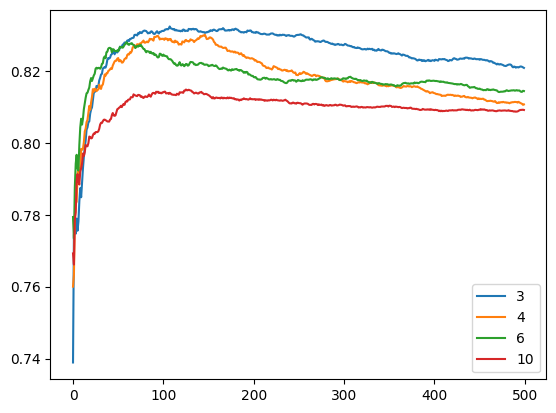

In [174]:
for max_depth in [3,4,6,10]:
  evals_result = {}
  xgb_params['max_depth'] = max_depth
  model = xgb.train(xgb_params, dtrain, num_boost_round = 500, evals = watchlist,verbose_eval = 10,evals_result = evals_result)
  plt.plot(range(len(evals_result['val']['auc'])),evals_result['val']['auc'],label=max_depth)
plt.legend()
plt.show()

We can conclude that the best max_depth is 3

In [226]:
xgb_params['max_depth'] = 3

[0]	train-auc:0.77610	val-auc:0.73891
[10]	train-auc:0.84675	val-auc:0.78896
[20]	train-auc:0.86931	val-auc:0.80928
[30]	train-auc:0.88080	val-auc:0.81808
[40]	train-auc:0.89038	val-auc:0.82347


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:44:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	train-auc:0.89756	val-auc:0.82583
[60]	train-auc:0.90319	val-auc:0.82847
[70]	train-auc:0.90768	val-auc:0.83005
[80]	train-auc:0.91221	val-auc:0.83117
[90]	train-auc:0.91638	val-auc:0.83029
[100]	train-auc:0.91913	val-auc:0.83113
[110]	train-auc:0.92297	val-auc:0.83170
[120]	train-auc:0.92544	val-auc:0.83124
[130]	train-auc:0.92789	val-auc:0.83169
[140]	train-auc:0.92997	val-auc:0.83095
[150]	train-auc:0.93243	val-auc:0.83102
[160]	train-auc:0.93487	val-auc:0.83118
[170]	train-auc:0.93693	val-auc:0.83127
[180]	train-auc:0.93881	val-auc:0.83178
[190]	train-auc:0.94069	val-auc:0.83084
[200]	train-auc:0.94246	val-auc:0.83067
[210]	train-auc:0.94406	val-auc:0.83026
[220]	train-auc:0.94594	val-auc:0.83046
[230]	train-auc:0.94746	val-auc:0.82992
[240]	train-auc:0.94866	val-auc:0.82982
[250]	train-auc:0.94976	val-auc:0.83004
[260]	train-auc:0.95107	val-auc:0.82935
[270]	train-auc:0.95301	val-auc:0.82829
[280]	train-auc:0.95414	val-auc:0.82808
[290]	train-auc:0.95530	val-auc:0.82724
[300]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:44:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[30]	train-auc:0.87817	val-auc:0.81850
[40]	train-auc:0.88465	val-auc:0.82246
[50]	train-auc:0.88984	val-auc:0.82587
[60]	train-auc:0.89510	val-auc:0.82763
[70]	train-auc:0.89872	val-auc:0.82935
[80]	train-auc:0.90216	val-auc:0.83101
[90]	train-auc:0.90515	val-auc:0.83253
[100]	train-auc:0.90701	val-auc:0.83310
[110]	train-auc:0.90897	val-auc:0.83407
[120]	train-auc:0.91030	val-auc:0.83412
[130]	train-auc:0.91208	val-auc:0.83490
[140]	train-auc:0.91435	val-auc:0.83486
[150]	train-auc:0.91607	val-auc:0.83481
[160]	train-auc:0.91795	val-auc:0.83515
[170]	train-auc:0.91938	val-auc:0.83483
[180]	train-auc:0.92207	val-auc:0.83379
[190]	train-auc:0.92311	val-auc:0.83374
[200]	train-auc:0.92464	val-auc:0.83266
[210]	train-auc:0.92613	val-auc:0.83183
[220]	train-auc:0.92743	val-auc:0.83176
[230]	train-auc:0.92877	val-auc:0.83164
[240]	train-auc:0.92997	val-auc:0.83124
[250]	train-auc:0.93097	val-auc:0.83164
[260]	train-auc:0.93198	val-auc:0.83159
[270]	train-auc:0.93353	val-auc:0.83176
[280]	t

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:44:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	train-auc:0.88031	val-auc:0.82576
[60]	train-auc:0.88345	val-auc:0.82945
[70]	train-auc:0.88596	val-auc:0.83073
[80]	train-auc:0.88832	val-auc:0.83254
[90]	train-auc:0.89024	val-auc:0.83380
[100]	train-auc:0.89204	val-auc:0.83463
[110]	train-auc:0.89363	val-auc:0.83575
[120]	train-auc:0.89519	val-auc:0.83618
[130]	train-auc:0.89629	val-auc:0.83672
[140]	train-auc:0.89760	val-auc:0.83731
[150]	train-auc:0.89866	val-auc:0.83728
[160]	train-auc:0.89970	val-auc:0.83743
[170]	train-auc:0.90050	val-auc:0.83681
[180]	train-auc:0.90142	val-auc:0.83663
[190]	train-auc:0.90267	val-auc:0.83612
[200]	train-auc:0.90405	val-auc:0.83580
[210]	train-auc:0.90505	val-auc:0.83574
[220]	train-auc:0.90591	val-auc:0.83517
[230]	train-auc:0.90747	val-auc:0.83521
[240]	train-auc:0.90840	val-auc:0.83494
[250]	train-auc:0.90925	val-auc:0.83461
[260]	train-auc:0.91001	val-auc:0.83467
[270]	train-auc:0.91108	val-auc:0.83452
[280]	train-auc:0.91208	val-auc:0.83459
[290]	train-auc:0.91262	val-auc:0.83472
[300]

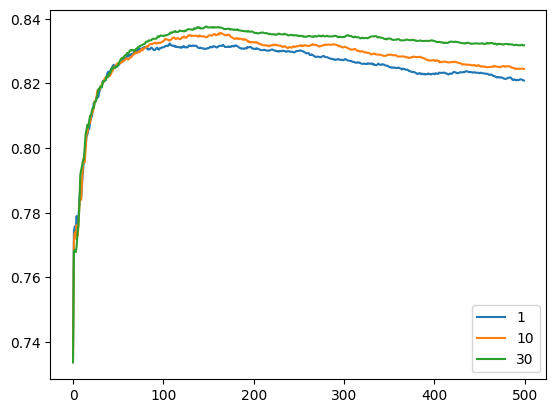

In [227]:
for min_child_weight in [1,10,30]:
  evals_result = {}
  xgb_params['min_child_weight'] = min_child_weight
  model = xgb.train(xgb_params, dtrain, num_boost_round = 500, evals = watchlist,verbose_eval = 10,evals_result = evals_result)
  plt.plot(range(len(evals_result['val']['auc'])),evals_result['val']['auc'],label=min_child_weight)
plt.legend()
plt.show()

We can conclude that the best min_child_weight is 1. Also, our choice for the number of trees will be around 180

In [228]:
xgb_params['min_child_weight'] = 1

### Training the final Model

In [229]:
y_train = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values
del df_train_full['status']
del df_test['status']

In [230]:
dict_train = df_train_full.to_dict(orient = 'records')
dict_test = df_test.to_dict(orient = 'records')
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
xgb_params = {
 'eta': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'nthread': 8,
 'seed': 1,
 'silent': 1
}

In [231]:
dtrain = xgb.DMatrix(data = X_train, label = y_train, feature_names = dv.feature_names_)
dtest = xgb.DMatrix(data = X_test, label = y_test, feature_names = dv.feature_names_)

In [232]:
model = xgb.train(xgb_params, dtrain, num_boost_round = 180)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:44:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [233]:
y_pred = model.predict(dtest)
roc_auc_score(y_test,y_pred)

0.8333659156443967

## Conclusions

As we can see, Although better, The XGBoost model is not significantly different from the Random Forest. Sitting at 83.3% accuracy while the Random Forest model is at 82.5% accuracy.

Both models are signifcantly better than the decision tree model which sits at 76.8% accuracy